In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [128]:
t_step = 0.05
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
q = 0
p = 1
par = x,y,p,q
k = 0.1
gamma = 0.1
mu = 2
beta = 0.2
alpha = 1.0
count = 6
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta, count)

# Van der Pol

<p>Calculating Period, Frequency, angular frequency and Amplitude for a changing alpha value (0-5)
because the Van der Pol Oscillator doesnt change its Oscillation behavior, the Period, Frequency,.. ect can be be calculate with more accuracy (more timesteps)</p>

if mu = 0.01, the period is 2π

for the Simulation, we gonna use mu = 2, to have this rectangular limit cycle

In [110]:
# vdp specific values
t_step_vdp = 0.01
t_last_vdp = 1000 # 1 point represent 1mHz
t_vdp = np.arange(0, 5000, t_step_vdp)
keep_vdp = int(t_last_vdp / t_step_vdp)
x_vdp = 0.5
y_vdp = 0.5
q_vdp = 0.5
p_vdp = 0.5
par_vdp = x,y,p,q
count_vdp = 10
vdp = OnesidedCoupling(par_vdp, t_vdp, keep_vdp, k, mu, gamma, alpha, beta, count_vdp)

In [111]:
period_vdp = vdp.period()[0]
f_vdp = 1/period_vdp
w_vdp = 2 * np.pi * f_vdp
amp_vdp = np.mean(vdp.find_peaks_max()[1][1]['peak_heights'][-count:])

print(period_vdp)
print(f_vdp)
print(w_vdp)
print(amp_vdp)


7.6299999999999955
0.1310615989515073
0.8234843128675741
0.5531821709936059


## Solutions

In [112]:
xsol = lilie.x_solv()[:keep]
ysol = lilie.y_solv()[:keep]
psol = lilie.p_solv()[:keep]
qsol = lilie.q_solv()[:keep]


## Find Peaks

In [113]:
xmax = lilie.maximumofplot()[0]
ymax = lilie.maximumofplot()[1]
x_amplitude = lilie.find_peaks_max()[0]
y_amplitude = lilie.find_peaks_max()[1]

# Timeseries
showing the timeseries for Van der Pol Oscillator and Duffing oscillator with the Maximum peak of the Plot.

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


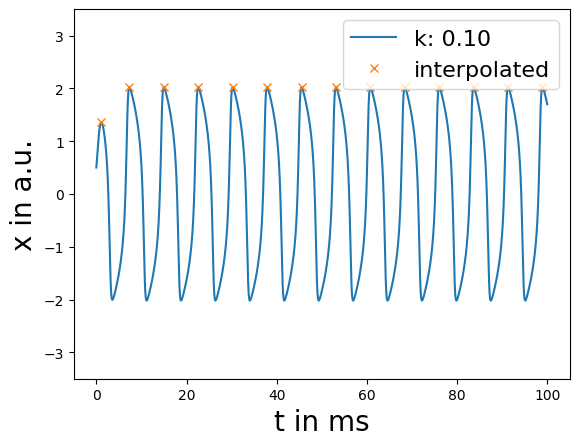

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


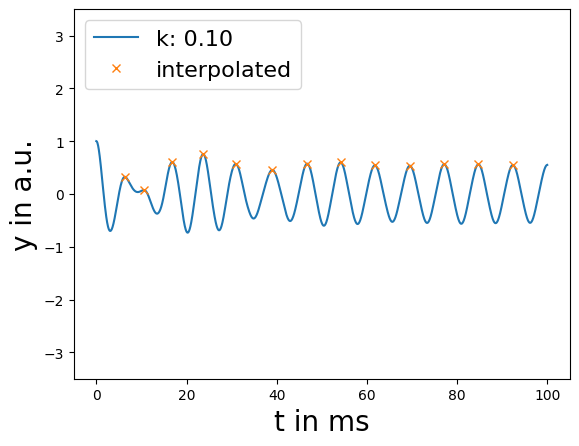

In [114]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "interpolated")
# plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "max peak")

plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

In [115]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:252: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


## Quadratic Interpolation

In [116]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

In [117]:
xing, x_amplitude[1]['peak_heights']

([np.float64(1.3554112013444155),
  np.float64(2.0198250340203785),
  np.float64(2.0199681694724916),
  np.float64(2.0198687418100008),
  np.float64(2.0199990928219904),
  np.float64(2.019918726382457),
  np.float64(2.019824605258009),
  np.float64(2.0199655134301793),
  np.float64(2.019865589964411),
  np.float64(2.019997704089292),
  np.float64(2.019915461815799),
  np.float64(2.0198225350222856),
  np.float64(2.019962811655205),
  np.float64(2.019862552815539)],
 array([1.35538167, 2.01965443, 2.01967662, 2.0198583 , 2.01927395,
        2.01987514, 2.01963685, 2.01969526, 2.01985065, 2.01930645,
        2.01987986, 2.01961696, 2.01971304, 2.0198423 ]))

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


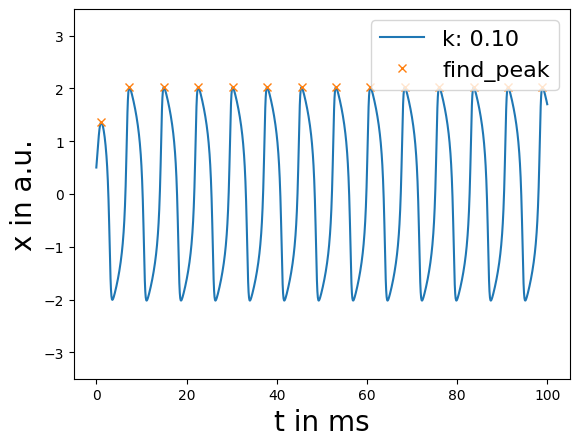

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


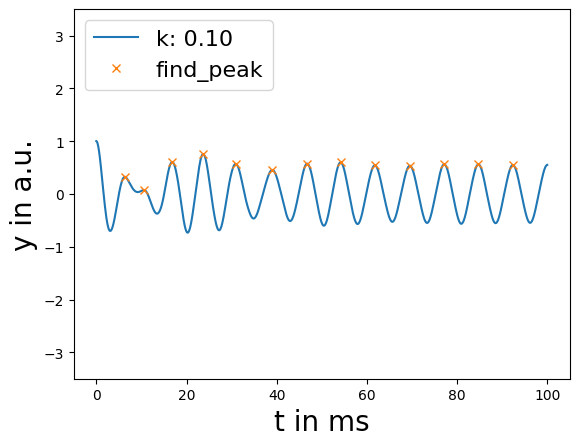

In [118]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot(tx_plus, xing, "x", label = "find_peak")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot(ty_plus, ying, "x", label = "find_peak")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Phasetime

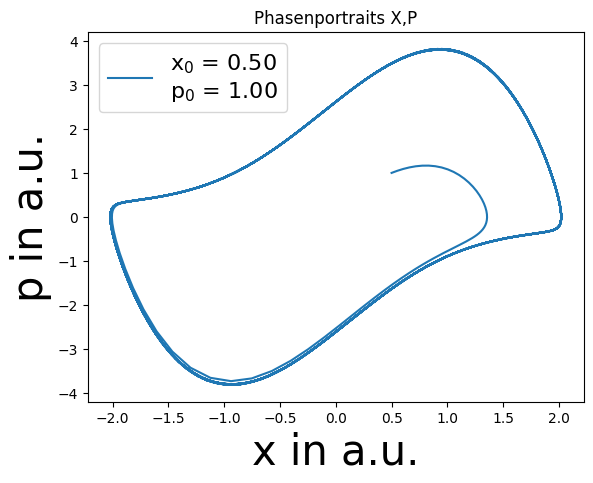

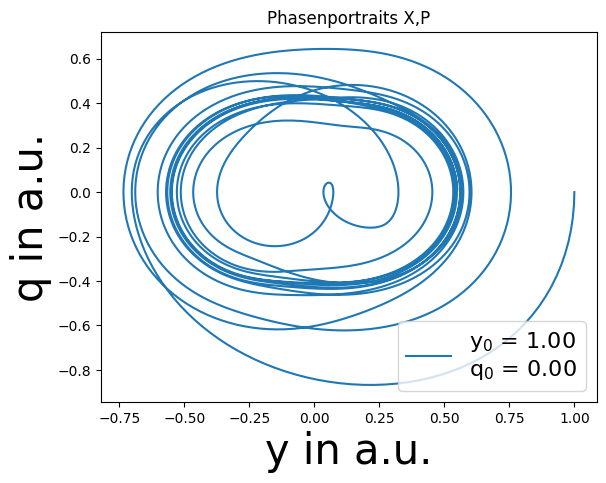

In [119]:

label = f"x$_0$ = {par[0]:.2f} \np$_0$ = {par[2]:.2f}"
plt.plot(xsol[-keep:],psol[-keep:],label = label)
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

label = f"y$_0$ = {par[1]:.2f} \nq$_0$ = {par[3]:.2f}"
plt.plot(ysol[-keep:],qsol[-keep:],label = label)
plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

# Resonance Curve

In [134]:
reso_alpha = np.arange(0, 5, 0.05)
omega = [np.sqrt(i) for i in reso_alpha]
revers_omega = [i for i in reversed(omega)]

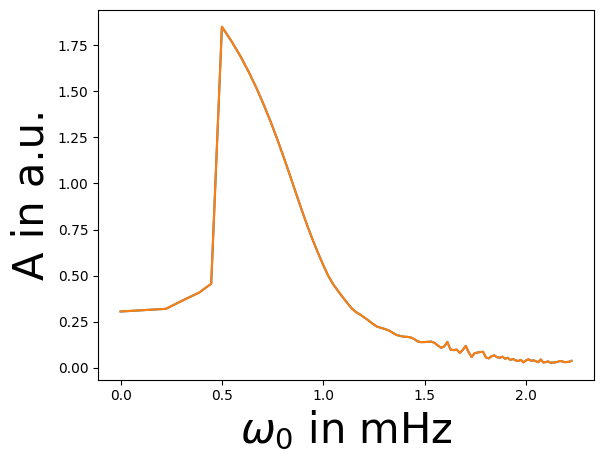

In [135]:
# findpeaks
amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta, count).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reso_alpha]
reverse_amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta, count).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reversed(reso_alpha)]
plt.plot(omega, amp)
plt.plot(revers_omega, reverse_amp)
plt.xlabel("$\omega _0$ in mHz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

# Phase difference

/var/folders/2q/qj12d6zd1qg4x5blqbp5z8fc0000gn/T/ipykernel_63682/1287595203.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 16, loc = "upper right")


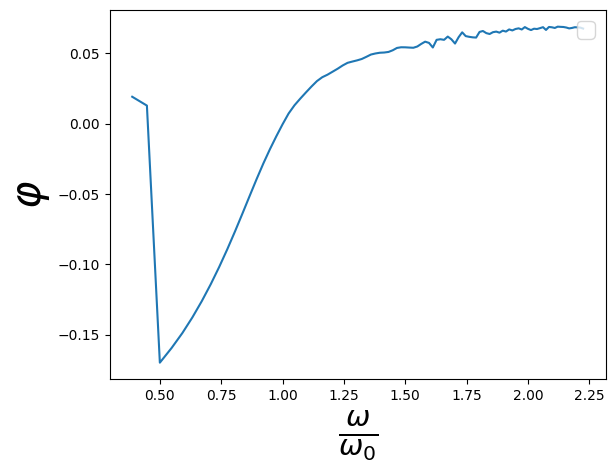

In [136]:
phaseamp = [(amp_vdp - i)/period_vdp for i in amp]

plt.plot(omega[3:], phaseamp[3:])
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\\frac{\omega}{\omega _0}$", fontsize = 30)
plt.ylabel("$\\varphi$",fontsize = 30)
plt.show()

# Randomstuff

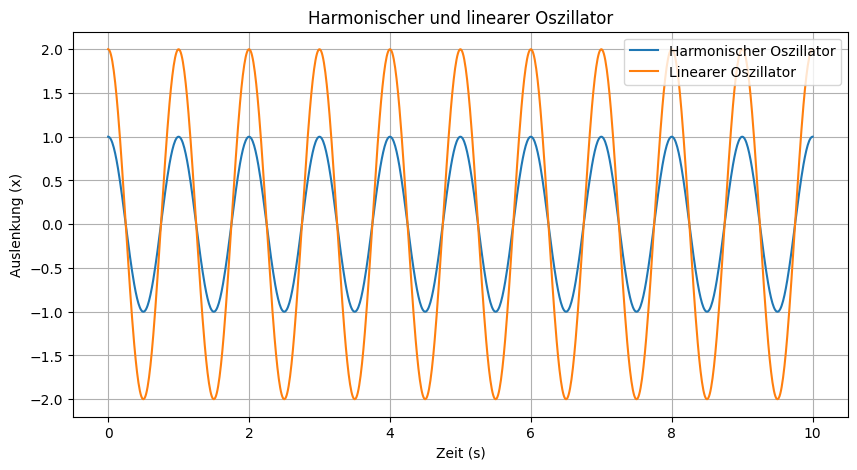

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
